# Librerías

In [ ]:
'''Librería para  formato de datos jerárquico que se usa en el NILMTK como fuente datos'''
import h5py
'''Librería para calculo numerico'''
import numpy as np
'''Librería para gráficas'''
import matplotlib.pyplot as plt
'''Importa para dividir el conjunto de datos en entrenamiento y prueba'''
from sklearn.model_selection import train_test_split
'''Clase para  evaluar y seleccionar los parámetros de un modelo'''
from sklearn.model_selection import GridSearchCV
'''Librería para utilizar el modelo SVM'''
from sklearn import svm
'''Librería que que ofrece metricas'''
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
'''Clase para determinar la matriz de confusión'''
from sklearn.metrics import confusion_matrix
'''Graficar la matriz de confusión'''
from sklearn.metrics import plot_confusion_matrix
'''Librería para validación cruzada para evaluación'''
from sklearn.model_selection import cross_validate, KFold

In [ ]:
'''Selección de caracteristicas'''
h5_color     = '/content/drive/MyDrive/Mineria/caracteristicasColor/color_caracteristicas.h5'
'''Selección de etiquetas'''
h5_colorLb   = '/content/drive/MyDrive/Mineria/caracteristicasColor/color_caracteristicas_etiquetas.h5'
'''Puntuación'''
scoring      = {'accuracy' : make_scorer(accuracy_score),
                'f1_score' : make_scorer(f1_score, average = 'weighted'), 
                'precision' : make_scorer(precision_score, average = 'weighted'),
                'recall' : make_scorer(recall_score, average = 'weighted')}

<h1>Lectura de Caracteristicas y etiquetas

In [ ]:
'''Importar el vector de características y las etiquetas entrenadas'''
h5f_color   = h5py.File(h5_color, 'r')
h5f_colorLb = h5py.File(h5_colorLb, 'r')

'''Cadena de características de color'''
color_features_string          = h5f_color['mascararillasCaracteristicas']
'''Cadena de características de etiqueta de color'''
color_features_labels_string   = h5f_colorLb['mascarillasCaracteristicas_Etiquetas']

'''Matriz de cadena características '''
color_features = np.array(color_features_string)
'''Matriz de cadena características de etiqueta'''
color_features_labels  = np.array(color_features_labels_string)

'''Cerrar los identificadores h5f'''
h5f_color.close()
h5f_colorLb.close()

'''Verificar la forma del vector de características y las etiquetas'''
print("[STATUS] features shape: {}".format(color_features.shape))
print("[STATUS] labels shape: {}".format(color_features_labels.shape))

'''Estado'''
print("[STATUS] Comenzó el modelamiento...")

[STATUS] features shape: (6718, 512)
[STATUS] labels shape: (6718,)
[STATUS] Comenzó el modelamiento...


In [ ]:
'''Apilar matrices en secuencia horizontal'''
global_features = np.hstack([color_features])
'''Impresion del estado'''
print("[STATUS] features shape: {}".format(global_features.shape))

[STATUS] features shape: (6718, 512)


<h1>Indentificar X y Y

In [ ]:
'''Variable para Caracteristicas'''
X = global_features
'''Variable para Etiqueta'''
Y = color_features_labels

<h1> Entrenamiento y prueba

In [ ]:
'''Se divide el conjunto de datos en 80% para entrenamiento y 20% para prueba'''
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size   = 0.20,
                                                    random_state = 9)

'''Tamaño del array en X_train y X_test'''
X_train.shape, X_test.shape

((5374, 512), (1344, 512))

<h1>Kernel

In [ ]:
'''Cuadrícula de parámetros lineales'''
linear_param_grid = {    
        "kernel": ["linear"],
        "C": [0.0001, 0.001, 0.1, 1, 10, 100, 1000],
        "decision_function_shape": ['ovo', 'ovr']
}

<h1> Kernel Lineal

In [ ]:
'''Ajuste de hiperparámetros SVM mediante GridSearchCV'''
linear_grid = GridSearchCV(svm.SVC(), linear_param_grid)
'''Entrenamiento'''
linear_grid.fit(X_train,y_train)
'''Impresión de estimador'''
print(linear_grid.best_estimator_)

SVC(C=1000, decision_function_shape='ovo', kernel='linear')


<h1> Predicción

In [ ]:
'''Predección para el valor futuro de la prueba'''
linear_pred = linear_grid.predict(X_test)
'''Métrica de Exactitud'''
linear_accuracy = accuracy_score(y_test, linear_pred)
'''Métrica de precisión'''
linear_precision = precision_score(y_test, linear_pred, average='weighted')
'''Métrica de Sensibilidad'''
linear_recall = recall_score(y_test, linear_pred, average='weighted')
'''Métrica de Puntuación f1'''
linear_f1 = f1_score(y_test, linear_pred, average='weighted')
print('Accuracy (Linear Kernel): ', "%.2f" % (linear_accuracy*100))
print('F1 (Linear Kernel): ', "%.2f" % (linear_f1*100))
print('Precision (Linear Kernel): ', "%.2f" % (linear_precision*100))
print('Recall (Linear Kernel): ', "%.2f" % (linear_recall*100))

Accuracy (Linear Kernel):  78.20
F1 (Linear Kernel):  78.18
Precision (Linear Kernel):  78.51
Recall (Linear Kernel):  78.20


<h1> Métricas de validación

In [ ]:
'''Validación cruzada'''
results = cross_validate(estimator=linear_grid, X=X_train, y=y_train, scoring=scoring)

'''Métrica de Exactitud'''
print('Accuracy (Linear Kernel): ', "%.2f" % (np.mean(results['test_accuracy'])*100))
'''Métrica de Puntuación f1'''
print('F1 (Linear Kernel): ', "%.2f" % (np.mean(results['test_f1_score'])*100))
'''Métrica de precisión'''
print('Precision (Linear Kernel): ', "%.2f" % (np.mean(results['test_precision'])*100))
'''Métrica de Sensibilidad'''
print('Recall (Linear Kernel): ', "%.2f" % (np.mean(results['test_recall'])*100))

Accuracy (Linear Kernel):  77.47
F1 (Linear Kernel):  77.44
Precision (Linear Kernel):  77.60
Recall (Linear Kernel):  77.47


<h1> Matriz de Confusión

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


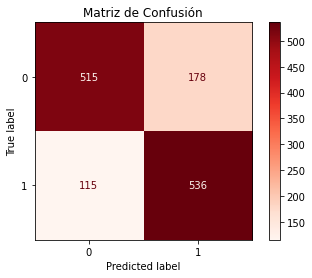

In [ ]:
'''Matriz de confusión'''
confusion_matrix(y_test, linear_pred)
plot_confusion_matrix(linear_grid, X_test, y_test, cmap=plt.cm.Reds)
plt.title("Matriz de Confusión")
plt.show()